In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [9]:
file_path = '../data/diabetes.csv'
df = pd.read_csv(file_path)

# Set the seed for reproducibility
np.random.seed(42)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### a) Sample 25 observations and compare Glucose mean & max

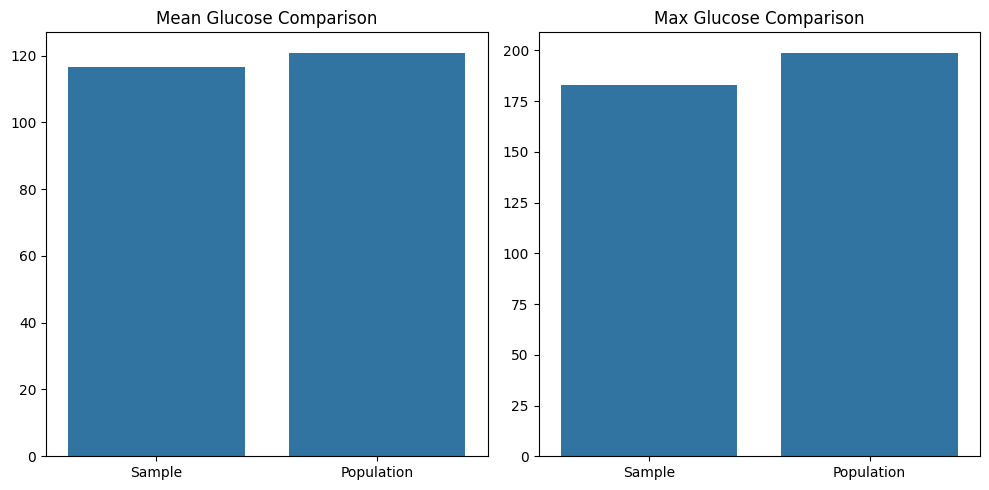

In [10]:
# Random sample of 25
sample_25 = df.sample(n=25)

# Sample statistics
sample_mean_glucose = sample_25['Glucose'].mean()
sample_max_glucose = sample_25['Glucose'].max()

# Population statistics
population_mean_glucose = df['Glucose'].mean()
population_max_glucose = df['Glucose'].max()

# Bar plot for mean and max comparison
plt.figure(figsize=(10, 5))

# Mean Glucose
plt.subplot(1, 2, 1)
sns.barplot(x=['Sample', 'Population'], y=[sample_mean_glucose, population_mean_glucose])
plt.title('Mean Glucose Comparison')

# Max Glucose
plt.subplot(1, 2, 2)
sns.barplot(x=['Sample', 'Population'], y=[sample_max_glucose, population_max_glucose])
plt.title('Max Glucose Comparison')

plt.tight_layout()
plt.show()


### b) 98th Percentile of BMI

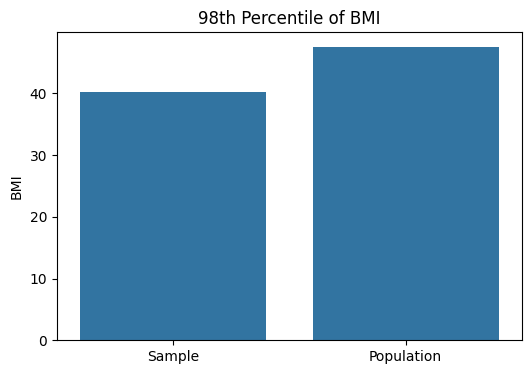

In [11]:
# 98th percentile of BMI
sample_98th_bmi = np.percentile(sample_25['BMI'], 98)
population_98th_bmi = np.percentile(df['BMI'], 98)

# Bar plot for percentile comparison
plt.figure(figsize=(6, 4))
sns.barplot(x=['Sample', 'Population'], y=[sample_98th_bmi, population_98th_bmi])
plt.title('98th Percentile of BMI')
plt.ylabel('BMI')
plt.show()


### c) Bootstrap 500 samples of 150 obs for BloodPressure

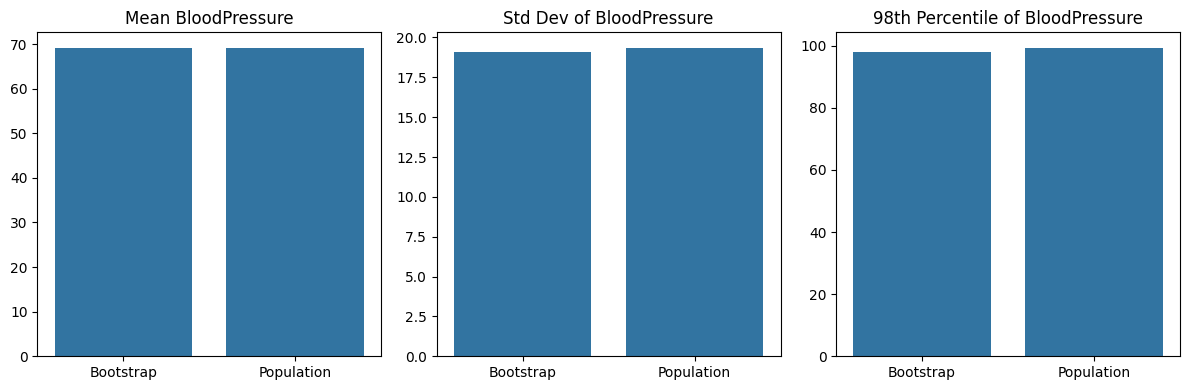

In [12]:
bootstrap_means = []
bootstrap_stds = []
bootstrap_percentiles = []

for _ in range(500):
    sample = df.sample(n=150, replace=True)
    bp = sample['BloodPressure']
    bootstrap_means.append(bp.mean())
    bootstrap_stds.append(bp.std())
    bootstrap_percentiles.append(np.percentile(bp, 98))

# Mean, std, 98th percentile from bootstrap
mean_of_means = np.mean(bootstrap_means)
mean_of_stds = np.mean(bootstrap_stds)
mean_of_percentiles = np.mean(bootstrap_percentiles)

# Population statistics
pop_mean = df['BloodPressure'].mean()
pop_std = df['BloodPressure'].std()
pop_98th = np.percentile(df['BloodPressure'], 98)

# Compare via bar charts
plt.figure(figsize=(12, 4))

# Mean
plt.subplot(1, 3, 1)
sns.barplot(x=['Bootstrap', 'Population'], y=[mean_of_means, pop_mean])
plt.title('Mean BloodPressure')

# Std
plt.subplot(1, 3, 2)
sns.barplot(x=['Bootstrap', 'Population'], y=[mean_of_stds, pop_std])
plt.title('Std Dev of BloodPressure')

# 98th Percentile
plt.subplot(1, 3, 3)
sns.barplot(x=['Bootstrap', 'Population'], y=[mean_of_percentiles, pop_98th])
plt.title('98th Percentile of BloodPressure')

plt.tight_layout()
plt.show()


## Summary

In [13]:
print("Population Mean Glucose:", population_mean_glucose)
print("Sample Mean Glucose:", sample_mean_glucose)
print("Population Max Glucose:", population_max_glucose)
print("Sample Max Glucose:", sample_max_glucose)

print("\nPopulation 98th Percentile BMI:", population_98th_bmi)
print("Sample 98th Percentile BMI:", sample_98th_bmi)

print("\nBootstrap Avg Mean BloodPressure:", mean_of_means)
print("Population Mean BloodPressure:", pop_mean)
print("Bootstrap Avg Std Dev BloodPressure:", mean_of_stds)
print("Population Std Dev BloodPressure:", pop_std)
print("Bootstrap Avg 98th Percentile BloodPressure:", mean_of_percentiles)
print("Population 98th Percentile BloodPressure:", pop_98th)


Population Mean Glucose: 120.89453125
Sample Mean Glucose: 116.64
Population Max Glucose: 199
Sample Max Glucose: 183

Population 98th Percentile BMI: 47.52599999999996
Sample 98th Percentile BMI: 40.248

Bootstrap Avg Mean BloodPressure: 69.17696
Population Mean BloodPressure: 69.10546875
Bootstrap Avg Std Dev BloodPressure: 19.08274018350705
Population Std Dev BloodPressure: 19.355807170644777
Bootstrap Avg 98th Percentile BloodPressure: 97.92404000000003
Population 98th Percentile BloodPressure: 99.31999999999994
